## Atelier Adaboost


### Contexte: 
Nous souhaitons mettre en place un modèle approprié permettant d'identifier si le client de la banque est dépositaire ou non.
### Description du Dataset
Notre Dataset 'bank_full.csv' contient des informations sur tous les clients de la banque. 
La dataset contient 16 variables indépendantes ( age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, compaign, pdays, previous, poutcome) et une variable dépendante (cible).
Il existe de nombreuses colonnes qui ne sont pas numériques.

In [1]:
# Importer les libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

### Load Dataset

In [2]:
# Importer le dataset
data=pd.read_csv('bank-full.csv')

In [3]:
#Visualiser les 5 premiers
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Visualiser les derniers enregistrements
data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Exploration des données

In [5]:
# demensions
data.shape

(45211, 17)

In [6]:
# Analyse descriptive du dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Text(0, 0.5, 'frequences')

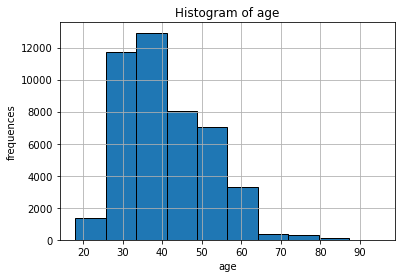

In [7]:
#histogram age
data['age'].hist(edgecolor = 'black')
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('frequences')

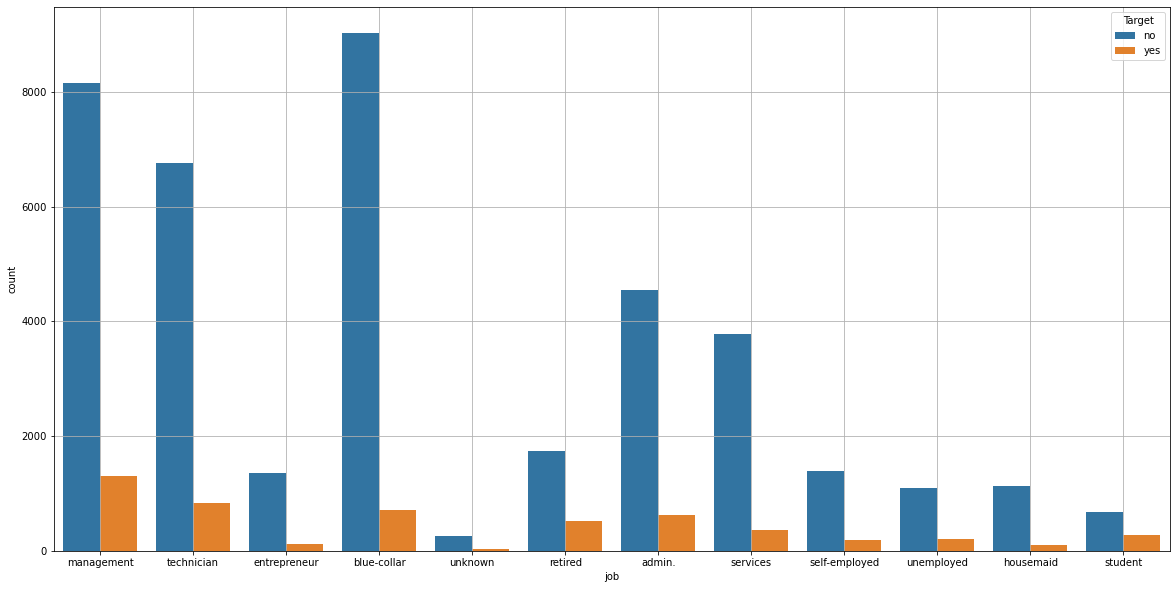

In [8]:
#countplot job
plt.figure(figsize=(20,10))
ax = sns.countplot(x="job",hue='Target', data=data)
plt.grid()


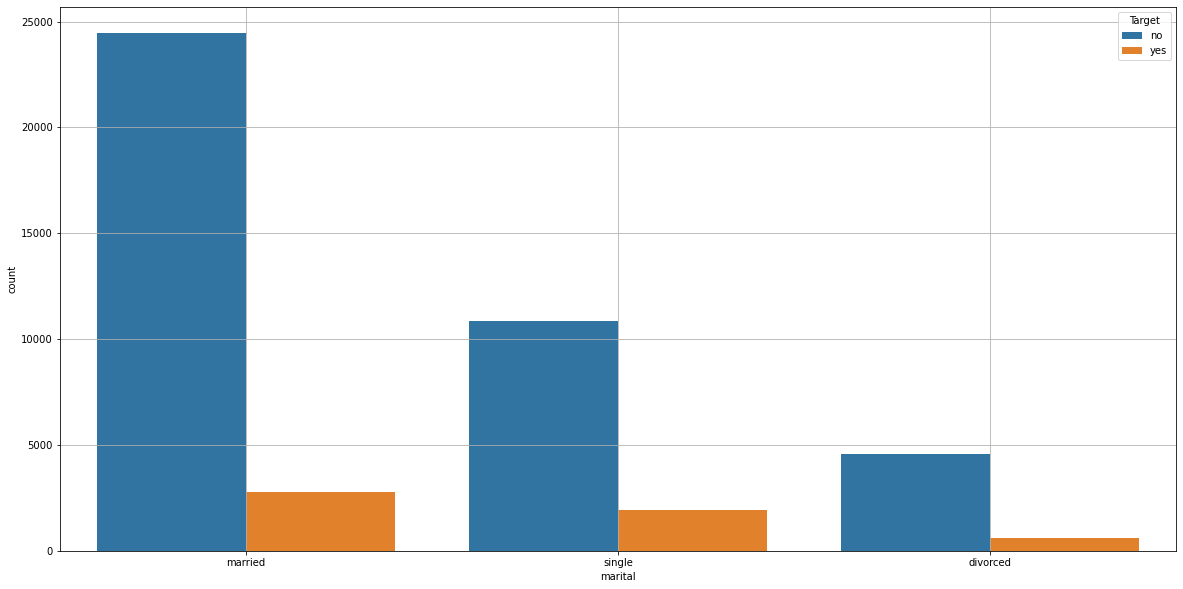

In [9]:
#countplot Marital status
plt.figure(figsize=(20,10))
ax = sns.countplot(x="marital",hue='Target', data=data)
plt.grid()

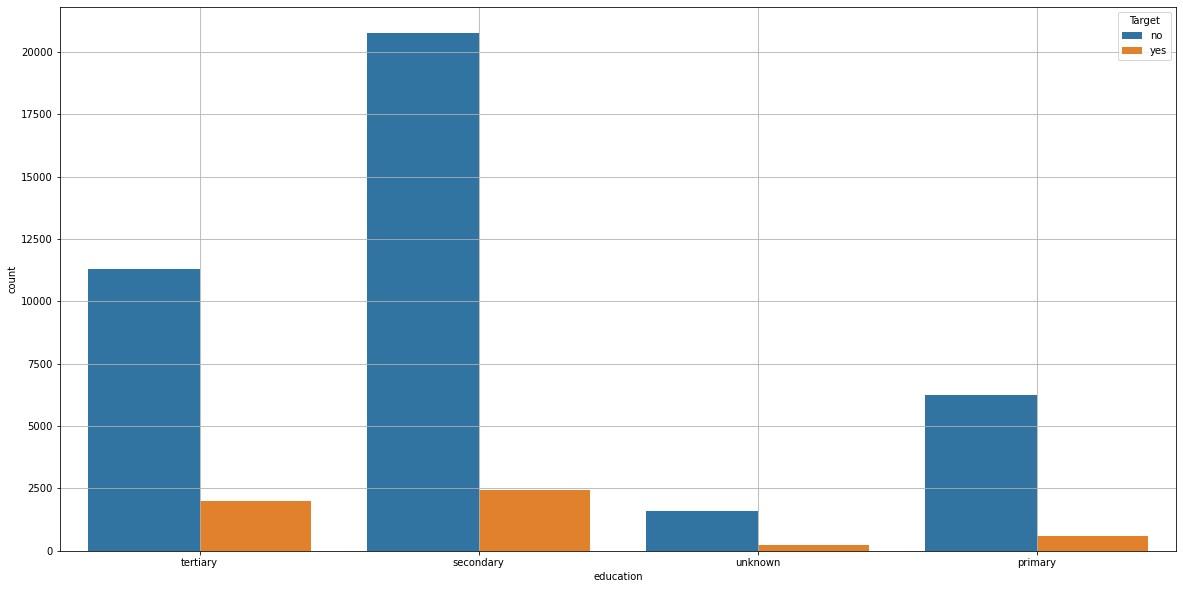

In [10]:
#countplot education level
plt.figure(figsize=(20,10))
ax = sns.countplot(x="education",hue='Target', data=data)
plt.grid()


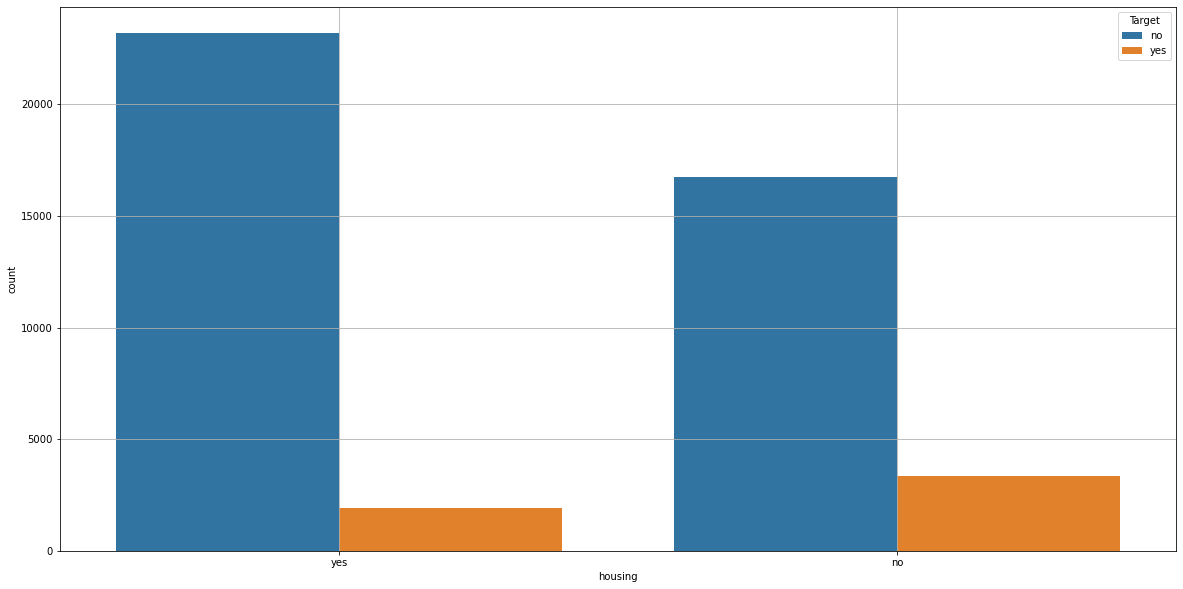

In [11]:
#countplot housing

plt.figure(figsize=(20,10))
ax = sns.countplot(x="housing",hue='Target', data=data)
plt.grid()


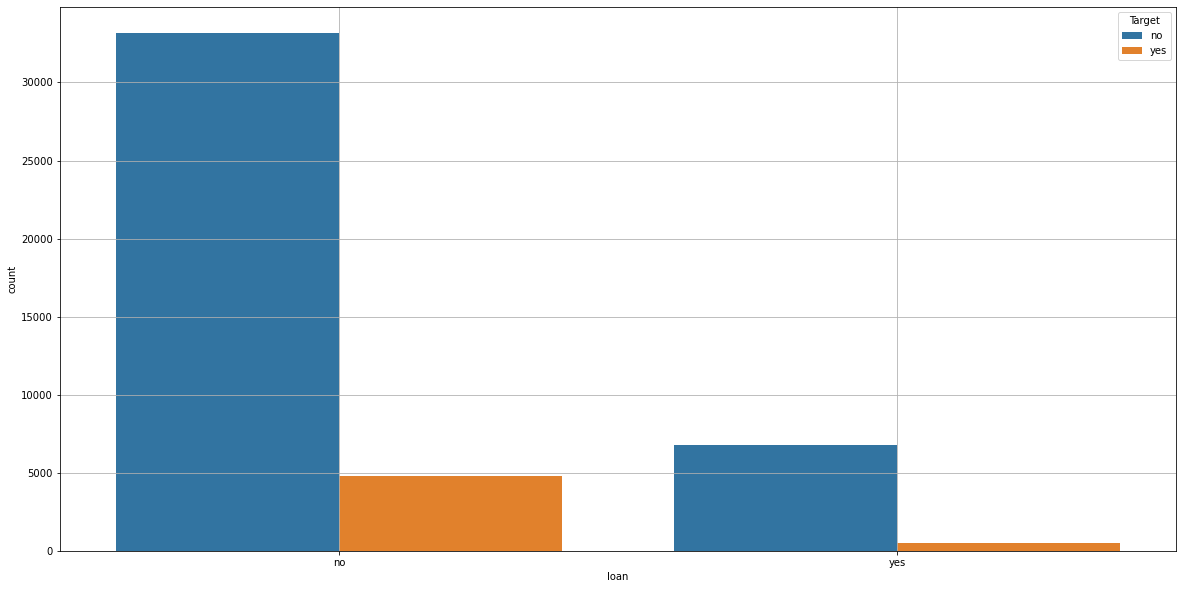

In [12]:
#countplot loan
plt.figure(figsize=(20,10))
ax = sns.countplot(x="loan",hue='Target', data=data)
plt.grid()



In [13]:
#on peut eliminer le poutcome le taux unkown grande  poutcome peut eliminer car sa variance faible n affecte pas target 
data=data.replace({'unknown':None,'other':None})
categorical_features =[]
numerical_features =[]
for col in data.columns:
    if data[col].dtypes == 'object' :
        categorical_features.append(col)
    else:
        numerical_features.append(col)
data=data.fillna(data.mode().iloc[0])#same of strategy most frequent imputer remplacer les nan unkown avec most frequent 
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no


In [14]:
#Encoding of categorical variables
le = LabelEncoder()
df=data.copy()
df[categorical_features] = df[categorical_features].apply(lambda col: le.fit_transform(col))
print(df['education'].value_counts(normalize=True))
print(df['job'].value_counts(normalize=True))
df

1    0.554268
2    0.294198
0    0.151534
Name: education, dtype: float64
1     0.221627
4     0.209197
9     0.168034
0     0.114375
7     0.091880
5     0.050076
6     0.034925
2     0.032890
10    0.028820
3     0.027427
8     0.020747
Name: job, dtype: float64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,1,2,1,0,1,0,0,0,5,8,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,0,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,0,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,1,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,0,0


In [15]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no


In [16]:
# corrlation matrix 
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.034420,-0.403240,-0.164888,-0.017879,0.097783,-0.185513,-0.015655,0.170349,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.035526,0.025155
job,-0.034420,1.000000,0.062377,0.184084,-0.005285,0.015769,-0.108219,-0.025496,-0.010252,0.025840,-0.090921,0.006361,0.003448,-0.020931,0.001307,0.027081,0.040786
marital,-0.403240,0.062377,1.000000,0.119220,-0.007023,0.002122,-0.016096,-0.046893,-0.020524,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,0.023788,0.045588
education,-0.164888,0.184084,0.119220,1.000000,-0.011539,0.067184,-0.075157,-0.025282,-0.070190,0.025931,-0.075052,0.002635,0.003703,0.004264,0.025175,0.051593,0.068633
default,-0.017879,-0.005285,-0.007023,-0.011539,1.000000,-0.066745,-0.006025,0.077234,-0.017208,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,-0.023344,-0.022419
balance,0.097783,0.015769,0.002122,0.067184,-0.066745,1.000000,-0.068768,-0.084350,0.037999,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,0.035240,0.052838
housing,-0.185513,-0.108219,-0.016096,-0.075157,-0.006025,-0.068768,1.000000,0.041323,-0.080822,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.091360,-0.139173
loan,-0.015655,-0.025496,-0.046893,-0.025282,0.077234,-0.084350,0.041323,1.000000,-0.013183,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,-0.053713,-0.068185
contact,0.170349,-0.010252,-0.020524,-0.070190,-0.017208,0.037999,-0.080822,-0.013183,1.000000,0.023652,-0.004616,-0.023201,0.053895,0.016006,0.028097,0.008470,0.014042
day,-0.009120,0.025840,-0.005261,0.025931,0.009424,0.004503,-0.027982,0.011370,0.023652,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,-0.030321,-0.028348


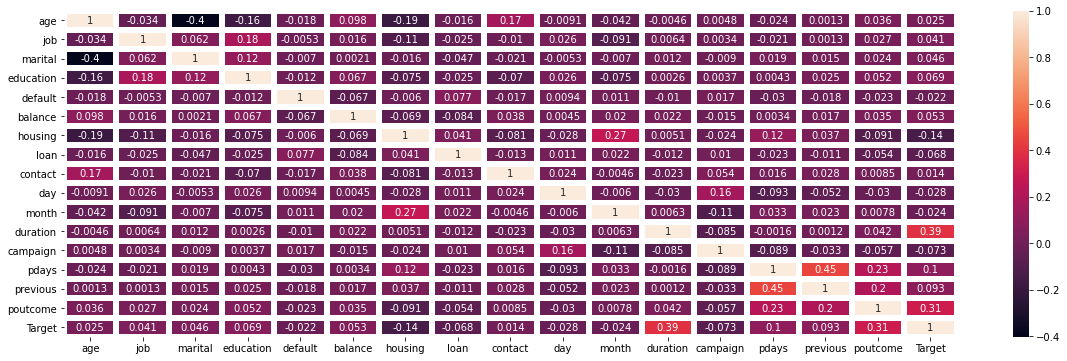

In [17]:
# correlation plot---heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(df.corr(), annot=True,linewidths=5)
plt.show()

In [18]:
#split data X and Y
y=df[['Target']]
x=df.drop('Target',axis=1)

In [19]:
# Split X and y into training and test set in 70,30 
x_train, x_test, y_train, y_test =train_test_split(x, y, train_size=0.7, random_state=0)

### Decision Tree Model

In [20]:
#Fit, predict    
param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(1,10,1)}
grid=GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid,cv=5,scoring ='roc_auc')#courbe roc comme critere car la base est desequilibre
grid.fit(x_train,y_train)
model_dt =grid.best_estimator_
y_pred=model_dt.predict(x_test)

{'criterion': 'entropy', 'max_depth': 6}
score entrainement= 0.9077953676493823
score test= 0.8963432615747567
accuracy =  0.8963432615747567


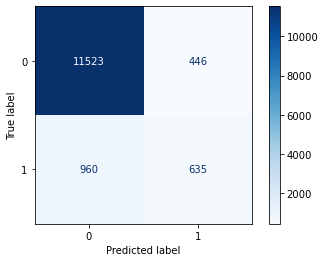

In [21]:
#Evaluate the model using accuracy and confusion matrix
print(grid.best_params_)
print('score entrainement=',model_dt.score(x_train,y_train))
print('score test=',model_dt.score(x_test,y_test))
print('accuracy = ',accuracy_score(y_test, y_pred))#meme test score
plot_confusion_matrix(model_dt, x_test, y_test,cmap=plt.cm.Blues)  
plt.show()

### Random Forest Classifier

In [22]:
#fit, predict
param_grid = {
    'bootstrap': [True],# Method of selecting samples for training each tree(bagging)
     'oob_score':[True],#average of all tree 
    'max_depth': [None,10,15],# Maximum number of levels in tree
    'max_features': ['auto'],# Number of features to consider at every split
    'min_samples_leaf': [2,3,5,8],# Minimum number of samples required at each leaf node
    #'min_samples_split': [3,4,5,6],# Minimum number of samples required to split a node
    'n_estimators': [1000]# Number of trees in random forest
}
rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, verbose = 2,scoring ='roc_auc')#courbe roc comme critere car la base est desequilibre(target n est pas equilibree)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
model_rf=grid_search.best_estimator_
model_rf.fit(x_train, y_train)
y_pred=model_rf.predict(x_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 1000, 'oob_score': True}
0.9233747566037598


<ipython-input-22-9a3cdbf37bb9>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 1000, 'oob_score': True}
score entrainement= 0.9808512655227983
score test= 0.9026098496018874
accuracy =  0.9026098496018874


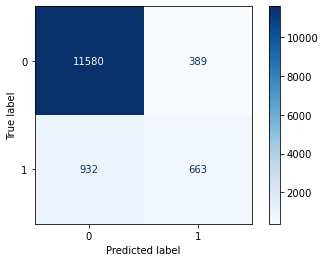

In [23]:
#Evaluate the model using accuracy and confusion matrix
print(grid_search.best_params_)
print('score entrainement=',model_rf.score(x_train,y_train))
print('score test=',model_rf.score(x_test,y_test))
print('accuracy = ',accuracy_score(y_test, y_pred))
plot_confusion_matrix(model_rf, x_test, y_test,cmap=plt.cm.Blues)  
plt.show()

### Ensemble Learning Adaboost

In [26]:
#Fit, predict
model_adb = AdaBoostClassifier(n_estimators=1000,learning_rate=1)#n_estimators: Number of weak learners to train iteratively,learning_rate: It contributes to the weights of weak learners(ceoff des estimateur ayant fausse predict). It uses 1 as a default value.
model_adb.fit(x_train, y_train)
y_pred=model_adb.predict(x_test)
#adabost sere a optimiser accuracy cad corriger par chaque arbre de decision cree les fausse prediction de l arbre precedente donc boost accuracy mais on peut ameliorer score avec gridsearchcv


C:\Users\alish\anaconda3_new\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


score entrainement= 0.9052990804815623
score test= 0.8981126511353583
accuracy =  0.8981126511353583


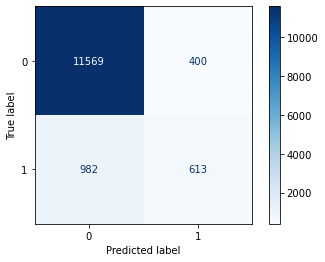

In [27]:
#Evaluate the model using accuracy and confusion matrix
print('score entrainement=',model_adb.score(x_train,y_train))
print('score test=',model_adb.score(x_test,y_test))
print('accuracy = ',accuracy_score(y_test, y_pred))
plot_confusion_matrix(model_adb, x_test, y_test,cmap=plt.cm.Blues)  
plt.show()